# Teste Para Data Science Elo
## Implementação do teste técnico

## 1 - Primeiro checar as informações do dataset:

#### - importa os módulos padrão para o início das análises:

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### - Leitura do dataset:

In [71]:
df = pd.read_csv(r'elo7_recruitment_dataset.csv', delimiter=',')

#### - Para verificação dos dados do dataset e as 5 primeiras linhas:

In [72]:
df.head()

product_id  seller_id                                query  search_page  \
0    11394449    8324141                       espirito santo            2   
1    15534262    6939286                     cartao de visita            2   
2    16153119    9835835                expositor de esmaltes            1   
3    15877252    8071206  medidas lencol para berco americano            1   
4    15917108    7200773                 adesivo box banheiro            3   

   position                                 title  \
0         6                Mandala Espírito Santo   
1         0                      Cartão de Visita   
2        38  Organizador expositor p/ 70 esmaltes   
3         6        Jogo de Lençol Berço Estampado   
4        38               ADESIVO BOX DE BANHEIRO   

                                   concatenated_tags        creation_date  \
0                                        mandala mdf  2015-11-14 19:42:12   
1  cartao visita panfletos tag adesivos copos lon...  2018-04-04 20:55:07   
2                                          expositor  2018-10-13 20:57:07   
3                  t jogo lencol menino lencol berco  2017-02-27 13:26:03   
4                               adesivo box banheiro  2017-05-09 13:18:38   

        price  weight  express_delivery  minimum_quantity  view_counts  \
0  171.890000  1200.0                 1                 4          244   
1   77.670000     8.0                 1                 5          124   
2   73.920006  2709.0                 1                 1           59   
3  118.770004     0.0                 1                 1          180   
4  191.810000   507.0                 1                 6           34   

   order_counts     category  
0           NaN    Decoração  
1           NaN  Papel e Cia  
2           NaN       Outros  
3           1.0         Bebê  
4           NaN    Decoração

Segue as informações das colunas do:

- product_id - identificação de produto
- seller_id - identificação do vendedor
- query - termo de busca inserido pelo usuário
- search_page - número da página que o produto apareceu nos resultados de busca (mín 1 e máx 5)
- position - número da posição que o produto apareceu dentro da página de busca (mín 0 e máx 38)
- title - título do produto
- concatenated_tags - tags do produto inseridas pelo vendedor (as tags estão concatenadas por espaço)
- creation_date - data de criação do produto na plataforma do Elo7
- price - preço do produto em reais
- weight - peso em gramas da unidade do produto reportado pelo vendedor
- express_delivery - indica se o produto é pronta entrega (1) ou não (0)
- minimum_quantity - quantidade de unidades mínima necessária para compra
- view_counts - número de cliques no produto nos últimos três meses
- order_counts - número de vezes que o produto foi comprado nos últimos três meses
- category - categoria do produto

#### - Para verificar informações e os tipos de dados presentes no dataset:

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38507 entries, 0 to 38506
Data columns (total 15 columns):
product_id           38507 non-null int64
seller_id            38507 non-null int64
query                38507 non-null object
search_page          38507 non-null int64
position             38507 non-null int64
title                38507 non-null object
concatenated_tags    38505 non-null object
creation_date        38507 non-null object
price                38507 non-null float64
weight               38449 non-null float64
express_delivery     38507 non-null int64
minimum_quantity     38507 non-null int64
view_counts          38507 non-null int64
order_counts         18117 non-null float64
category             38507 non-null object
dtypes: float64(3), int64(7), object(5)
memory usage: 4.4+ MB


**- Pode se observar que:**
- a coluna 'order_counts' tem apenas 18117 linhas, enquanto a maioria das colunas estão completas com 38507. 
- a coluna 'weight' também tem 38449 linhas.
- a coluna 'concatenated_tags' tem 2 linhas faltantes.
 
#### Trataremos essas inconsistências em breve.

#### - Para uma descrição estatística mais rápida e detalhada das colunas numéricas:

In [74]:
df.describe().T

count          mean           std     min         25%  \
product_id        38507.0  8.342724e+06  4.834912e+06  361.00  4142514.00   
seller_id         38507.0  5.009902e+06  2.947791e+06  817.00  2472772.00   
search_page       38507.0  1.491885e+00  9.805703e-01    1.00        1.00   
position          38507.0  1.688901e+01  1.158853e+01    0.00        6.00   
price             38507.0  8.405416e+01  2.118053e+02    0.07       12.75   
weight            38449.0  3.618367e+02  1.820815e+03    0.00        6.00   
express_delivery  38507.0  7.806373e-01  4.138202e-01    0.00        1.00   
minimum_quantity  38507.0  1.459657e+01  4.376894e+01    0.00        3.00   
view_counts       38507.0  5.455205e+02  1.416509e+03    1.00      119.00   
order_counts      18117.0  2.738141e+01  6.053336e+01    1.00        8.00   

                         50%         75%          max  
product_id        8375490.00  12530894.0  16692953.00  
seller_id         4917720.00   7640886.0  10118868.00  
search_page             1.00         2.0         5.00  
position               16.00        27.0        38.00  
price                  28.49        90.0     11509.38  
weight                  9.00       107.0     65009.00  
express_delivery        1.00         1.0         1.00  
minimum_quantity        7.00        16.0      3000.00  
view_counts           242.00       521.0     45010.00  
order_counts           15.00        26.0      2460.00

_________________________________________________________________________________________

## 2 - Após, será realizada a limpeza dos dados:

### - extração de colunas que não serão relevantes para o problema:

A princípio remover apenas as colunas dos índices, conforme for realizando a análise, reavaliar se há necessidade de remover outras colunas:

In [75]:
df = df.drop(['product_id','seller_id'], axis=1)

Para verificar se as colunas foram devidamentes removidas:

In [76]:
df.columns

Index(['query', 'search_page', 'position', 'title', 'concatenated_tags',
       'creation_date', 'price', 'weight', 'express_delivery',
       'minimum_quantity', 'view_counts', 'order_counts', 'category'],
      dtype='object')

#### - verificar os tipos de dados e reagrupá-las, para facilitar a remoção dos outliers.

*Outliers* são valores que desequilibram o dataframe e comprometem a capacidade de extrair insights com base nos dados.
Para isso as colunas foram reagrupados por tipo e foi criado uma função para excluir os outliers do nosso dataset

In [128]:
df.dtypes

query                category
search_page             int64
position                int64
title                category
concatenated_tags    category
creation_date        category
price                 float64
weight                float64
express_delivery        int64
minimum_quantity        int64
view_counts             int64
order_counts          float64
category             category
cat_num              category
dtype: object

In [127]:
float_cols = ['price', 'weight', 'order_counts']
 
categorical_cols = ['query', 'title', 'concatenated_tags', 'creation_date', 'category']

int_cols = ['search_page', 'position', 'express_delivery', 'minimum_quantity', 'view_counts']
 
def to_type(DataFrame, columns, type):
    for col in columns:
        DataFrame[col] = DataFrame[col].astype(type)
 
to_type(df, float_cols, 'float64')
to_type(df, int_cols, 'int64')
to_type(df, categorical_cols, 'category')

In [81]:
def exclui_outliers(DataFrame, col_name):
  intervalo = 2.7*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
  DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan

In [82]:
for col in float_cols:
  exclui_outliers(df, col)

In [83]:
for col in int_cols:
  exclui_outliers(df, col)

#### - verificação dos dados faltantes ou dados NaN:

In [84]:
df.isnull().sum()

query                    0
search_page           1051
position                 0
title                    0
concatenated_tags        2
creation_date            0
price                  475
weight                 490
express_delivery         0
minimum_quantity       147
view_counts            477
order_counts         20665
category                 0
dtype: int64

Conforme previsto na visualização das informações do dataset, confirmamos com esse comando que há dados faltantes.
Como retiramos os outliers também, o número de colunas com dados faltantes aumentaram.

**Como tratá-los:**

In [94]:
print('média:',df['search_page'].mean())
print('mediana:',df['search_page'].median())
print('moda:',df['search_page'].mode()[0])

média: 1.393448312686886
mediana: 1.0
moda: 1.0


Como os valores de mediana e moda são iguais, preenchi os dados do número das páginas faltantes com a moda.

In [95]:
df['search_page'] = df['search_page'].fillna(df['search_page'].mode()[0])

In [96]:
print('média:',df['price'].mean())
print('mediana:',df['price'].median())
print('moda:',df['price'].mode()[0])

média: 68.98087294507258
mediana: 27.6
moda: 12.0


Como os valores foram bem diferentes, foi escolhido a mediana, para preencher os dados faltantes dos preços.

In [97]:
df['price'] = df['price'].fillna(df['price'].median())

In [98]:
print('média:',df['weight'].mean())
print('mediana:',df['weight'].median())
print('moda:',df['weight'].mode()[0])

média: 220.40271457505852
mediana: 9.0
moda: 0.0


Mais uma vez os valores foram bem diferentes, foi escolhido a mediana, para preencher os dados faltantes do peso dos produtos.

In [99]:
df['weight'] = df['weight'].fillna(df['weight'].median())

In [101]:
print('média:',df['minimum_quantity'].mean())
print('mediana:',df['minimum_quantity'].median())
print('moda:',df['minimum_quantity'].mode()[0])

média: 12.822471324296142
mediana: 7.0
moda: 1.0


Para a quantidade mínima foi escolhido a mediana, para preencher os dados faltantes.

In [102]:
df['minimum_quantity'] = df['minimum_quantity'].fillna(df['minimum_quantity'].median())

In [103]:
print('média:',df['view_counts'].mean())
print('mediana:',df['view_counts'].median())
print('moda:',df['view_counts'].mode()[0])

média: 434.99997370496976
mediana: 238.0
moda: 97.0


Para o número de cliques no produto nos últimos três meses, foi utilizado a mediana também, para preenchimento de dados faltantes.

In [104]:
df['view_counts'] = df['view_counts'].fillna(df['view_counts'].median())

In [105]:
print('média:',df['order_counts'].mean())
print('mediana:',df['order_counts'].median())
print('moda:',df['order_counts'].mode()[0])

média: 21.88218809550499
mediana: 15.0
moda: 1.0


Como a coluna 'order_counts' tem mais da metade de dados faltantes e os seus valores são do tipo NaN, não numéricos, iremos substituir pela mediana.


In [106]:
df['order_counts'] = df['order_counts'].fillna(df['order_counts'].median())

Verificar se os dados foram inputados corretamente:

df.isnull().sum()

**Observação: Como a coluna 'concatenated_tags' é categórica e há apenas 2 dados faltantes, não faremos nada, pois será irrelevante.** 

## 3 - Formulação de questionamentos e Análise exploratória do dataset para respondê-los:

#### - Qual é meu atributo chave para responder as minhas perguntas?

Como queremos um classificador de categorias, a coluna 'category' é que preenche os requisistos para a criação do model.
Para isso, vamos transformá-la de categoria para int, pois assim, na geração dos modelos preditivos fica melhor.


Para verificar os valores e proporção das categorias dos produtos

<AxesSubplot:ylabel='category'>

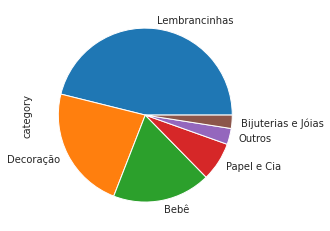

In [109]:
df['category'].value_counts().plot.pie()

In [140]:
def define_classe(classe):
    if classe == 'Lembrancinhas':
        return 1
    if classe == 'Decoração':
        return 2
    if classe == 'Bebê':
        return 3
    if classe == 'Papel e Cia':
        return 4
    if classe == 'Bijuterias e Jóias':
        return 5
    elif classe == 'Outros':
        return 6

df['cat_num'] = df['category'].map(define_classe)

#### - Existem correlação entre os atributos?

In [113]:
correlacoes = df.corr()

<AxesSubplot:>

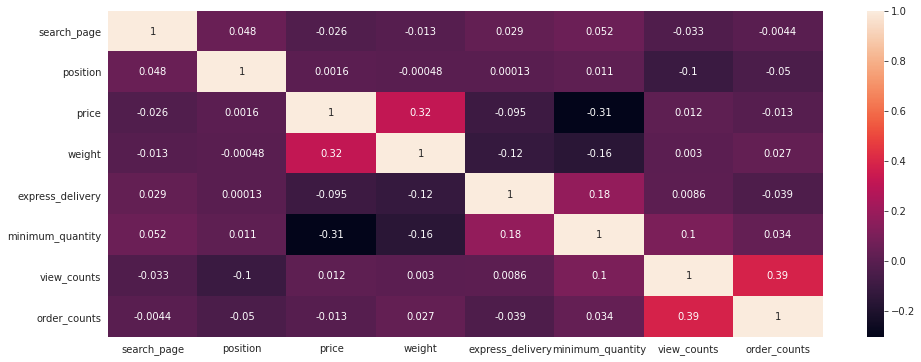

In [114]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

**Não há correlação(positiva ou negativa) forte entre os atributos** 

#### - Caso encontre a correlação, como é a dispersão entre eles?

Só há uma correlação média entre os atributos:

    - 'view_counts'/'order_counts'(positiva)
    - 'price'/'weight'(positiva)
    - 'price/'minimum_quantity'(negativa)

In [115]:
# Importando o Plot.ly
import plotly.express as px

In [117]:
# view_counts vs order_counts (Número de cliques no produto e número de vezes que o produto foi comprado)
fig = px.scatter(df, x=df.view_counts, y=df.order_counts)
fig.show()

**É possível verificar que há um aglomerado mais próximo de 1000 - 2000 no número de vezes que o produto foi visto de 50 - 100 vezes o produto foi comprado**

In [118]:
# price vs weight (Preço versus o peso do produto)
fig = px.scatter(df, x=df.price, y=df.weight)
fig.show()

**Não é possível deduzir uma relação nos atributos**

In [119]:
# Preço vs Quantidade mínima no pedido
fig = px.scatter(df, x=df.price, y=df.minimum_quantity)
fig.show()

**Não é possível deduzir uma dispersão nos atributos**

#### - Quais são os meus atributos principais?

Para isso, utilizei o algoritmo Random Forest, para estimar a importância de cada atributo. Ele retorna um score para cada atributo, quanto maior o score, maior é a importância desse atributo.

Retornou um erro, dizendo que os atributos não podem ser do tipo float nem do tipo string, portanto, irei retirar as colunas categóricas e transformar os dados de float para int.

In [142]:
data = df.drop(['query', 'title', 'concatenated_tags',
               'creation_date', 'category'], axis=1)

In [145]:
data['order_counts'] = data['order_counts'].astype(int)
data['price'] = data['price'].astype(int)
data['weight'] = data['weight'].astype(int)
data['cat_num'] = data['cat_num'].astype(int)

In [149]:
#para setar o X eu utilizo o dataset menos o atributo alvo
X = data.drop(['cat_num'], axis=1)

#para setar o y eu escolho o atributo alvo
y = data['cat_num']

In [150]:
from sklearn.ensemble import RandomForestClassifier

# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(n_estimators=10)

In [152]:
print(model.feature_importances_)

[0.02125662 0.12451986 0.27747402 0.15819005 0.01378447 0.15683724
 0.16772073 0.08021701]


In [153]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
price               0.277474
view_counts         0.167721
weight              0.158190
minimum_quantity    0.156837
position            0.124520
order_counts        0.080217
search_page         0.021257
express_delivery    0.013784

Gráfico com os a importância dos atributos em ordem decrescente, do mais importante para o menos importante.

<AxesSubplot:>

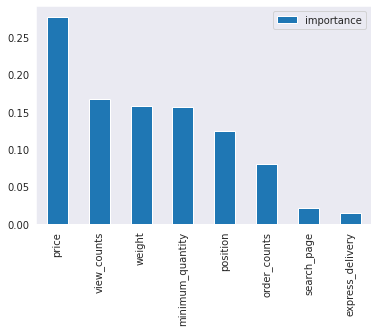

In [154]:
feature_importances.plot(kind='bar')

#### - Como os meus atributos se relacionam um com outro? E qual a sua distribuição?

Para verificar isso, veremos os gráficos de como os atributos se relacionam entre si, levando em consideração o nosso atributo alvo, que é a categoria. Para isso escolherei as 5 primeiras colunas na ordem de importância.

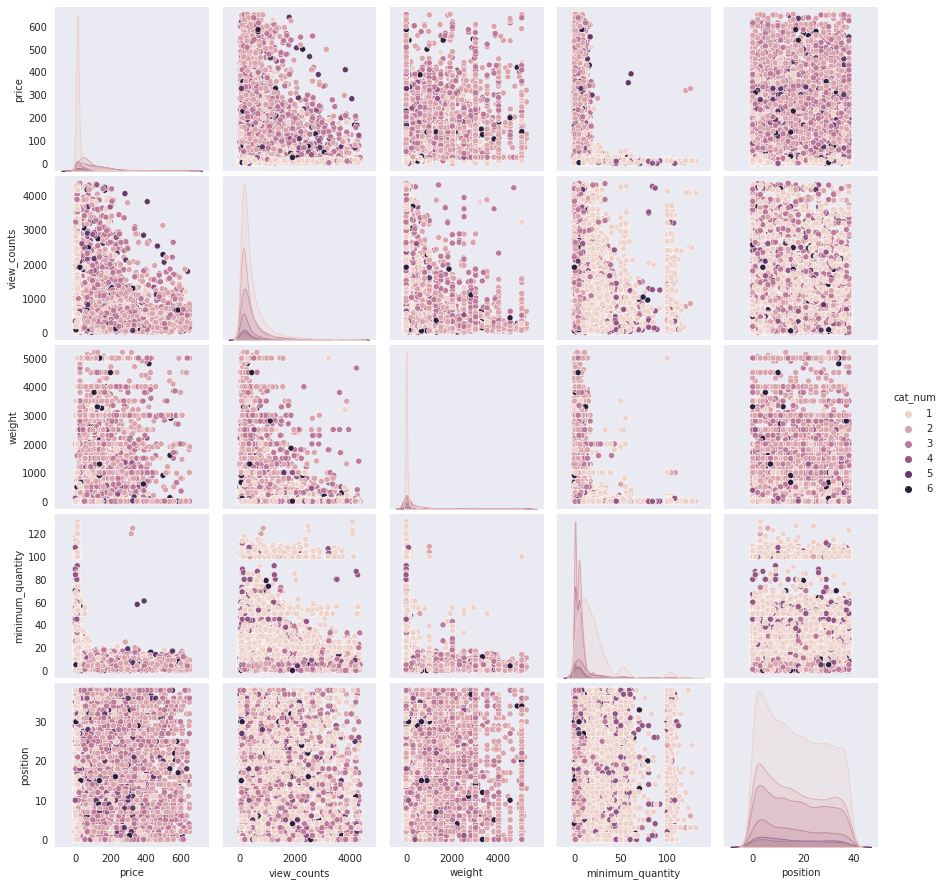

In [157]:
sns.pairplot(data[['price', 'view_counts', 'weight', 'minimum_quantity','position', 
                   'cat_num']], hue='cat_num')

### 4 - Modelagem:

#### - Quais melhores modelos para resolver o meu problema?

Por se tratar de um modelo de aprendizagem supervisionado(irei utilizar as categorias), o modelo escolhido foi o SVM, que é o Support Vector Machine. Que basicamente este algoritmo faz é, encontrar uma linha de separação, entre dados de duas classes. Essa linha busca maximizar a distância entre os pontos mais próximos em relação a cada uma das classes.

In [160]:
from sklearn import svm
from sklearn.svm import SVC #para modelos svc

#### - Utilização do framework optuna, para a hiperparâmetrização.

Para agilizar o processo e encontrar os melhores valores de parâmetros, escolhi o framework optuna, para obter melhores valores de clf_C e clf_gama.
 - o parâmetro gama define o quão longe a influência de um único exemplo de treinamento atinge, com valores baixos significando 'longe' e valores altos significando 'perto'. 
 -  o c se comporta como um parâmetro de regularização no SVM.

In [161]:
import optuna # framework para hiperparametrização

In [162]:
#Obtendo os dados e a classe para treinamento

X = data.loc[:,['price', 'weight', 'view_counts', 'minimum_quantity', 'position']]
y= data['cat_num']
print('Dados de Treinamento: ', X)
print('Dados de teste: ', y)

Dados de Treinamento:         price  weight  view_counts  minimum_quantity  position
0        171    1200          244                 4         6
1         77       8          124                 5         0
2         73    2709           59                 1        38
3        118       0          180                 1         6
4        191     507           34                 6        38
...      ...     ...          ...               ...       ...
38502     71     706          315                 4         7
38503     14       7         1288                26        27
38504     11      25          306               104         3
38505    131       0           55                11        36
38506      3       8          185                10         6

[38507 rows x 5 columns]
Dados de teste:  0        2
1        4
2        6
3        3
4        2
        ..
38502    2
38503    1
38504    1
38505    1
38506    1
Name: cat_num, Length: 38507, dtype: int64


**kernel**

As funções do kernel são usadas para mapear o conjunto de dados original (linear / não linear) em um espaço dimensional mais alto com vista a torná-lo um conjunto de dados linear.

Para essa primeira modelagem foi escolhido o kernel rbf também conhecida como gaussiana.

In [ ]:
pipeline = Pipeline([
    ('clf', SVC(kernel = 'rbf'))
])


def objective(trial):
    
    pipeline.set_params(clf__C =trial.suggest_loguniform("clf__C", 0.1, 1e3), 
                        clf__gamma = trial.suggest_loguniform("clf__gamma", 1e-4, 50))  
    score =cross_val_score(pipeline, X, y, cv=3)
    accuracy = score.mean()
    
    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, n_jobs=-1)

print("Melhor score: %0.3f" % study.best_trial.value)
print("Melhores parametros encontrados:")
print(study.best_trial.params)

E depois o kernel sigmoid

In [ ]:
pip_1 = Pipeline([
    ('clf', SVC(kernel = 'sigmoid'))
])

def objective(trial):
    
    pip_1.set_params(clf__C =trial.suggest_loguniform("clf__C", 0.1, 1e3), 
                        clf__gamma = trial.suggest_loguniform("clf__gamma", 1e-4, 50))  
    score =cross_val_score(pip_1, X, y, cv=3)
    accuracy = score.mean()
    
    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, n_jobs=-1)

print("Melhor score: %0.3f" % study.best_trial.value)
print("Melhores parametros encontrados:")
print(study.best_trial.params)

**Observação: Existem vários tipos de kernel, porém não consegui testar o polinomial e o linear, pois não tenho poder computacional e nem tempo disponível para esses teste.***

#### - Através dos resultados do optuna, otimar os parâmetros do modelo preditivo;

Utilizando o valor de clf_C e clf_gamma encontrando no optuna(C=763.9507889363115,gamma=12.189992529706405), criei alguns pipelines para verificar suas performances.
Primeiramente, vou padronizar os dados.

In [184]:
from sklearn.pipeline import Pipeline #para criar pipelines e simplificar treino/teste
from sklearn.preprocessing import StandardScaler

In [187]:
pip_1 = Pipeline([('scaler',StandardScaler()),('clf', svm.SVC(kernel='rbf',C=763.9507889363115,gamma=12.189992529706405))])

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [209]:
# imprime a quantidade de linhas dos conjuntos
print ('X_train: numero de linhas e colunas: {}'.format(X_train.shape))
print ('X_test: numero de linhas e colunas: {}'.format(X_test.shape))
print ('y_train: numero de linhas e colunas: {}'.format(y_train.shape))
print ('y_test: numero de linhas e colunas: {}'.format(y_test.shape))

X_train: numero de linhas e colunas: (26954, 5)
X_test: numero de linhas e colunas: (11553, 5)
y_train: numero de linhas e colunas: (26954,)
y_test: numero de linhas e colunas: (11553,)


#### - Atribuindo resultados a um dataframe

Manteremos um log ao longo dos testes

In [211]:
# cria um dataframe vazio
df_results = pd.DataFrame()

In [212]:
# adiciona a coluna valor_real
df_results['valor_real'] = y_test.values

In [ ]:
y_pred_1 = pip_1.predict(X_test)

In [190]:
pip_1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(C=763.9507889363115, gamma=12.189992529706405))])

In [193]:
y_pred_1 = pip_1.predict(X_test)

In [215]:
df_results['rbf_padronizado'] = pip_1.predict(X_test)

In [197]:
pip_1.score(X_test,y_test)

0.5240197351337315

In [199]:
# calcula a métrica rmse
from sklearn.metrics import mean_squared_error
from math import sqrt

In [200]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_1)))

In [201]:
# imprime a performance do modelo
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 1.5308931014997453 


Agora treinar o modelo com os dados normalizados

In [205]:
from sklearn import preprocessing #para normalizar os dados
from sklearn.preprocessing import MinMaxScaler

In [207]:
pip_2 = Pipeline([('scaler',MinMaxScaler()),('clf', svm.SVC(kernel='rbf',C=763.9507889363115,gamma=12.189992529706405))])

In [210]:
pip_2.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf', SVC(C=763.9507889363115, gamma=12.189992529706405))])

In [216]:
pip_2.predict(X_test)

array([3, 1, 2, ..., 5, 1, 1])

In [223]:
#Inclui os dados normalizados no dataframe de resultados
df_results['rbf_normalizado'] = pip_2.predict(X_test)

In [219]:
pip_2.score(X_test,y_test)

0.6037392884964944

In [220]:
y_pred_2 = pip_2.predict(X_test)

In [221]:
rmse1 = (np.sqrt(mean_squared_error(y_test, y_pred_2)))

In [224]:
rmse1

1.3281731706606918

In [222]:
df_results.head()

valor_real  rbf_padronizado  rbf_normalizado
0           3                3                3
1           1                4                1
2           3                2                2
3           2                2                2
4           1                1                1

#### - Balanceamento dos dados para verificar se o score aumenta.

Como o score e o RMSE está dando valores baixos, acredito que seja porque os números das categorias são muito distintas umas das outras, como vimos no gráfico de pizza.

In [225]:
data['cat_num'].value_counts()

1    17759
2     8846
3     7026
4     2777
6     1148
5      951
Name: cat_num, dtype: int64

Para isso irei fazer o balanceamento das categorias.

In [226]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

Escolhi o metódo Under-sampling para extrair um subconjunto aleatório da classe majoritária, preservando as características da classe minoritária, sendo ideal para situações onde você tem grandes volumes de dados. Apesar de reduzir o tempo computacional e de armazenamento, esta técnica descarta informações da classe majoritária, o que pode levar a uma performance inferior nas predições dela.

3    688
6    688
2    688
5    688
1    688
4    688
Name: cat_num, dtype: int64


/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



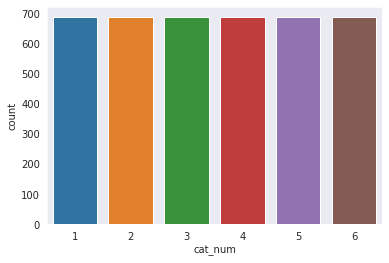

In [227]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())
 
# plotar a nova distribuição de classes
sns.countplot(y_res);

Agora novamente vou rodar os testes que fiz acima e verificar a eficácia.

In [256]:
pip_1_balance = Pipeline([('scaler',StandardScaler()),('clf', svm.SVC(kernel='rbf',C=763.9507889363115,gamma=12.189992529706405))])

In [257]:
pip_1_balance.fit(X_res, y_res)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(C=763.9507889363115, gamma=12.189992529706405))])

In [258]:
pip_1_balance.predict(X_res)

array([1, 1, 4, ..., 6, 6, 6])

In [259]:
y_pred_1_balance = pip_1.predict(X_res)

In [ ]:
#df_results['rbf_padronizado_balance'] = pip_1_balance.predict(X_res)

In [260]:
score_pip_1_balance = pip_1_balance.score(X_res,y_res)

In [261]:
rmse_balance = (np.sqrt(mean_squared_error(y_res, y_pred_1_balance)))

In [262]:
# imprime a performance do modelo
print('\nRMSE balance é: {} '.format(rmse_balance))
print('\nScore balance é: {} '.format(score_pip_1_balance))


RMSE balance é: 0.5832289634489135 

Score balance é: 0.9927215698890139 


In [238]:
print('\nRMSE é: {} '.format(rmse))
print('\nRMSE é: {} '.format(rmse_balance))


RMSE é: 1.5308931014997453 

RMSE é: 1.5308931014997453 


In [239]:
from imblearn.over_sampling import RandomOverSampler

6    12434
5    12434
4    12434
3    12434
2    12434
1    12434
Name: cat_num, dtype: int64


/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



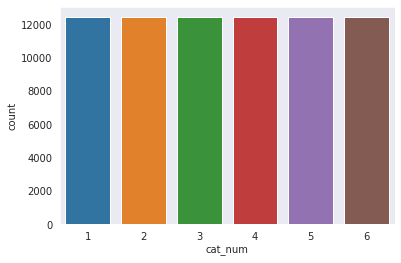

In [241]:
# usar técnica over-sampling
ros = RandomOverSampler()
X_res, y_res = ros.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())
 
# plotar a nova distribuição de classes
sns.countplot(y_res);

In [242]:
pip_1_balance_over = Pipeline([('scaler',StandardScaler()),('clf', svm.SVC(kernel='rbf',C=763.9507889363115,gamma=12.189992529706405))])

In [243]:
pip_1_balance_over.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(C=763.9507889363115, gamma=12.189992529706405))])

In [244]:
pip_1_balance_over.predict(X_test)

array([3, 4, 2, ..., 2, 2, 1])

In [245]:
y_pred_1_balance_over = pip_1_balance_over.predict(X_test)

In [246]:
df_results['rbf_padronizado_balance_over'] = pip_1_balance_over.predict(X_test)

In [247]:
pip_1_balance_over.score(X_test,y_test)

0.5240197351337315

In [248]:
rmse_balance_over = (np.sqrt(mean_squared_error(y_test, y_pred_1_balance_over)))

In [249]:
print('\nRMSE é: {} '.format(rmse))
print('\nRMSE  é: {} '.format(rmse1))
print('\nRMSE é: {} '.format(rmse_balance))
print('\nRMSE é: {} '.format(rmse_balance_over))


RMSE é: 1.5308931014997453 

RMSE é: 1.5308931014997453 

RMSE é: 1.5308931014997453 


In [254]:
df_results.head()

valor_real  rbf_padronizado  rbf_normalizado  rbf_padronizado_balance  \
0           3                3                3                        3   
1           1                4                1                        4   
2           3                2                2                        2   
3           2                2                2                        2   
4           1                1                1                        1   

   rbf_padronizado_balance_over  
0                             3  
1                             4  
2                             2  
3                             2  
4                             1

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# plotar a matrix de confusão
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)